In [1]:
import os
import numpy as np
import pandas as pd

读入CSV文件

In [2]:
filepath = os.getcwd() + '/datasets/'

In [3]:
ad_data = pd.read_csv(filepath + 'ad_result.csv')
ad_data

,month,tvcm,magazine,install
0,2013-01,6358,5955,53948
1,2013-02,8176,6069,57300
2,2013-03,6853,5862,52057
3,2013-04,5271,5247,44044
4,2013-05,6473,6365,54063
5,2013-06,7682,6555,58097
6,2013-07,5666,5546,47407
7,2013-08,6659,6066,53333
8,2013-09,6066,5646,49918
9,2013-10,10090,6545,59963


生成电视广告费和新用户数的散点图
生成杂志广告费和新用户数的散点图

In [4]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-deep')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

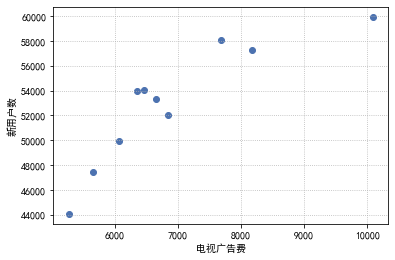

In [5]:
plt.scatter(ad_data.tvcm, ad_data.install)
plt.grid(linestyle=':')
plt.xlabel("电视广告费")
plt.ylabel("新用户数")
plt.show()


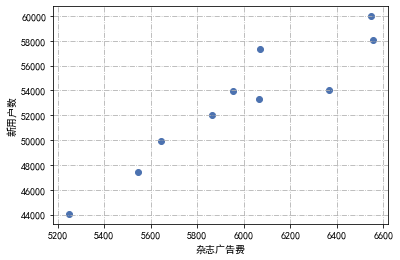

In [6]:
plt.scatter(ad_data.magazine, ad_data.install)
plt.grid(linestyle='-.')
plt.xlabel("杂志广告费")
plt.ylabel("新用户数")
plt.show()

进行回归分析

In [7]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [8]:
X = ad_data[['tvcm', 'magazine']]
y = ad_data['install']

In [9]:
lr_model = LinearRegression()
lr_model.fit(X, y) ## 训练模型
lr_model.score(X, y) ## 评估模型：决定系数R2

0.9379014301044467

In [10]:
lr_model.intercept_ ## 截距

188.174274830395

In [11]:
lr_model.coef_ ## 斜率

array([1.3609213 , 7.24980915])

In [12]:
X = sm.add_constant(X) ## 添加常数

In [13]:
lr_model = sm.OLS(y, X).fit()
lr_model.summary()

D:\Program Files (x86)\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                install   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     52.86
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           5.97e-05
Time:                        17:18:32   Log-Likelihood:                -84.758
No. Observations:                  10   AIC:                             175.5
Df Residuals:                       7   BIC:                             176.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        188.1743   7719.131      0.024      0.981   -1.81e+04    1.84e+04
tvcm           1.3609      0.517      2.630      0.034       0.137       2.584
magazine       7.2498      1.693      4.283      0.004       3.247      11.252
==============================================================================
Omnibus:                        0.992   Durbin-Watson:                   0.881
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.795
Skew:                           0.534   Prob(JB):                        0.672
Kurtosis:                       2.124   Cond. No.                     1.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""